<a href="https://colab.research.google.com/github/muhamadr03/Praktikum-ML/blob/main/Praktikum%20Mandiri%203/multiple_regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [2]:
path = '/content/drive/MyDrive/Praktikum ML/Praktikum Mandiri/data'
df = pd.read_csv(path + '/day.csv')
print("===== Lima Baris Pertama Dataset =====")
df.head()

===== Lima Baris Pertama Dataset =====


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
columns_to_drop = ['dteday', 'instant', 'casual', 'registered']
df_clean = df.drop(columns=columns_to_drop)
df_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


<Axes: >

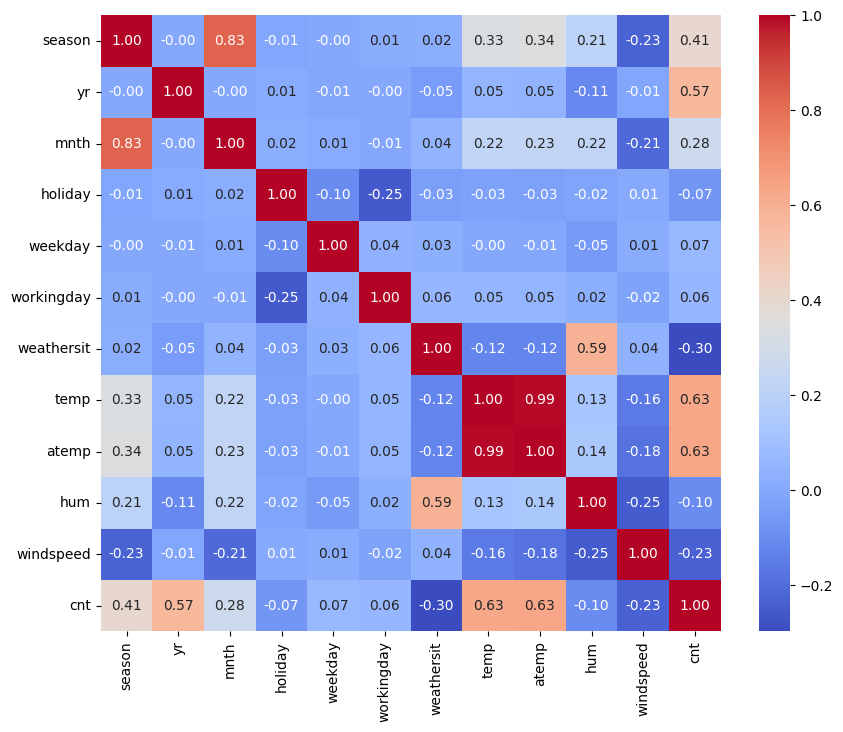

In [5]:
# Menghitung matriks korelasi untuk kolom yang tersisa
correlation_matrix = df_clean.corr()

# Menampilkan heatmap
plt.figure(figsize=(10, 8))
snb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [6]:
# Mendefinisikan fitur (X) dan target (y)
features = ['yr', 'temp', 'season', 'weathersit']
X = df_clean[features]
y = df_clean['cnt']


In [7]:
# Membagi data: 80% untuk training, 20% untuk testing
# random_state=42 memastikan bahwa setiap kali kode ini dijalankan,
# hasil pembagian datanya akan selalu sama (berguna untuk reproduktifitas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")

Ukuran data latih (X_train): (584, 4)
Ukuran data uji (X_test): (147, 4)


In [8]:
# Membuat objek model Regresi Linear
model = LinearRegression()

# Melatih model dengan data latih
model.fit(X_train, y_train)

print("Model berhasil dilatih!")

Model berhasil dilatih!


In [9]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Nilai R-squared (R2): {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.0f} sepeda")

# Menampilkan perbandingan beberapa nilai aktual vs prediksi
comparison_df = pd.DataFrame({'Nilai Aktual': y_test, 'Hasil Prediksi': y_pred.astype(int)})
print("\n--- Perbandingan Nilai Aktual vs Prediksi ---")
print(comparison_df.head(10))

Nilai R-squared (R2): 0.796
Mean Absolute Error (MAE): 681 sepeda

--- Perbandingan Nilai Aktual vs Prediksi ---
     Nilai Aktual  Hasil Prediksi
703          6606            6382
33           1550            1521
300          3747            2819
456          6041            4475
633          7538            6770
557          7264            7205
39           1605             479
356          2209            2497
559          7499            6514
514          5743            6797


Membuat plot regresi...


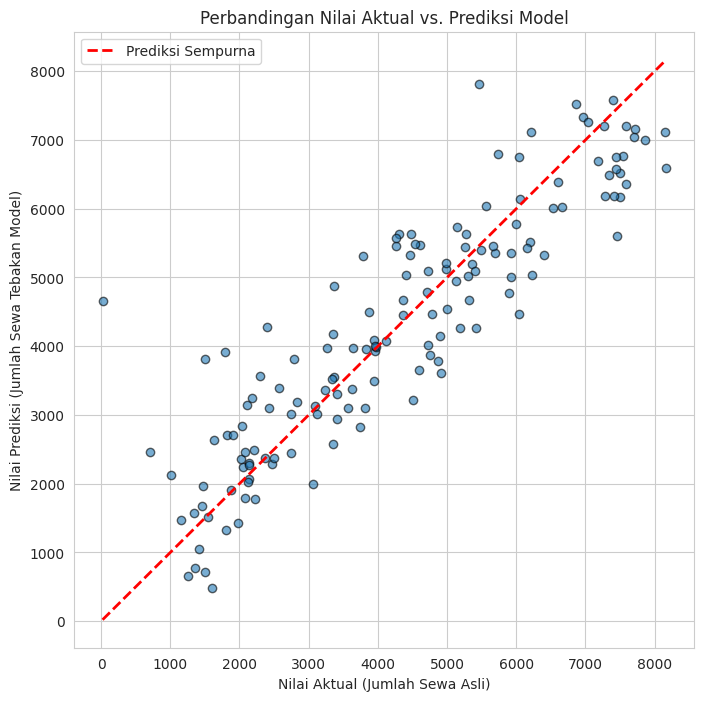

In [10]:
print("Membuat plot regresi...")

# Mengatur style plot agar terlihat lebih menarik
snb.set_style("whitegrid")

# Membuat scatter plot antara nilai aktual (y_test) dan prediksi (y_pred)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')

# Membuat garis diagonal (garis prediksi sempurna)
# Ini adalah garis di mana y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Prediksi Sempurna')

# Menambahkan label dan judul
plt.xlabel("Nilai Aktual (Jumlah Sewa Asli)")
plt.ylabel("Nilai Prediksi (Jumlah Sewa Tebakan Model)")
plt.title("Perbandingan Nilai Aktual vs. Prediksi Model")
plt.legend()
plt.show()

In [11]:
# Mendapatkan intercept dan koefisien dari model
intercept = model.intercept_
coefficients = model.coef_

# Membuat DataFrame untuk menampilkan koefisien dengan lebih rapi
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Koefisien'])

print(f"\nIntercept (nilai dasar): {intercept:.0f}")
print("\n--- Koefisien untuk Setiap Fitur ---")
print(coeff_df)

# Menampilkan persamaan regresi
print("\n--- Persamaan Regresi Final ---")
equation = f"cnt = {intercept:.0f}"
for feature, coef in zip(X.columns, coefficients):
    equation += f" + ({coef:.0f} * {feature})"
print(equation)


Intercept (nilai dasar): 873

--- Koefisien untuk Setiap Fitur ---
              Koefisien
yr          2034.201857
temp        5236.314069
season       437.934676
weathersit  -768.792096

--- Persamaan Regresi Final ---
cnt = 873 + (2034 * yr) + (5236 * temp) + (438 * season) + (-769 * weathersit)


In [12]:
hasil = pd.DataFrame()
hasil['Sewa Aktual'] = y_test
hasil['Prediksi Model'] = y_pred.astype(int)
hasil['Selisih Error'] = hasil['Prediksi Model'] - hasil['Sewa Aktual']
hasil['Akurasi (%)'] = 100 * (1 - abs(hasil['Selisih Error'] / hasil['Sewa Aktual']))
hasil['Akurasi (%)'] = hasil['Akurasi (%)'].clip(lower=0)

# Mengatur format tampilan angka
pd.options.display.float_format = '{:.2f}'.format

# Tampilkan 15 baris pertama dari tabel hasil
print("--- Tabel Analisis Error dan Akurasi (15 Baris Pertama) ---")
print(hasil.head(15))

--- Tabel Analisis Error dan Akurasi (15 Baris Pertama) ---
     Sewa Aktual  Prediksi Model  Selisih Error  Akurasi (%)
703         6606            6382           -224        96.61
33          1550            1521            -29        98.13
300         3747            2819           -928        75.23
456         6041            4475          -1566        74.08
633         7538            6770           -768        89.81
557         7264            7205            -59        99.19
39          1605             479          -1126        29.84
356         2209            2497            288        86.96
559         7499            6514           -985        86.86
514         5743            6797           1054        81.65
729         1796            3916           2120         0.00
355         3068            1990          -1078        64.86
164         4891            4143           -748        84.71
697         5260            5443            183        96.52
66          2133         